### Regression 
<p>What we are doing is from the data of csv file that initally look at corealation among the data. 25 students survey among hours and scores. From the data first we visualize from linear regression model. And see if the data is fitted in model ie if there is a corealtion among the data of hours and score. And predict the average score on the input on the basis of the trend data.</p>

<h2 align ='center'>Linear Regression </h2>

<p>Needed libaries</p>
<ol>
    <li>!pip3 install scikit-learn</li>
    <li>!pip3 install matplotlib</li>
    <li>!pip3 install pandas</li>
    <li>!pip3 install numpy</li>
    
</ol>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1. Reading data
<p>Initially we read the data, put it on csv file. So we can use it to train the linear regression model.</p>

In [2]:
data_student_csv = pd.read_csv('Data/student_scores.csv')
display(data_student_csv.head(6)) # the display function displays the csv file and head shows top 6 rows.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


#### 2. Visualizing Data (Data preprocessing to find underlying pattern to see the ovious)
<p>From our previous session we learn that whenever we have small dimension data 2d -3d data. Rule of thumb is that we should visualize the data to see the underlying pattern on it. Get a better understanding of how the AI model should be made. </p>

Text(0, 0.5, 'Scores')

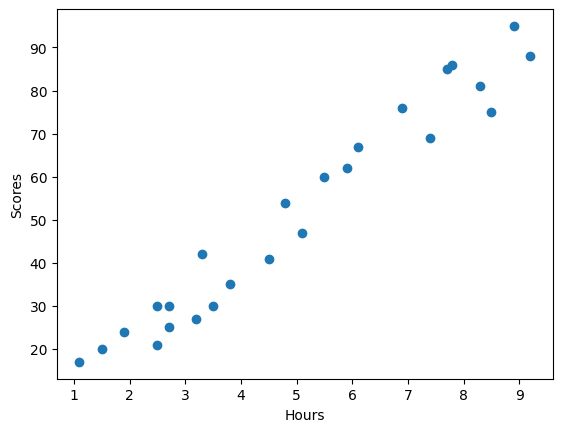

In [5]:
X = np.array(data_student_csv['Hours'])
Y = np.array(data_student_csv['Scores'])

plt.scatter(X,Y)
plt.xlabel('Hours') # x we have hours
plt.ylabel('Scores') # y we have scores #dependent
# figure out the independent and the dependent variable 
# looking at graph we need to make out what the graph is trying to say; the part should be done before any AI model.
# from the graph below we can see a line can be made; data are densly packed and increasing slowely. Directly propotional.
# initial digonisis thre is some kind of linear relationship among the data. if hours increase then score increase. 
# hours is independent in this case of experiment but grades are dependent upon hours.

#### 3. Understanding Linear regression 
<p>Least squares method: This type of regression helps to find the best fit line which describes the points. A line that can explain or describe each point. Line of best fit. The sum of errors to make the square of errors less in order to find the line of best fit.</p>
<p>Plot the y=mx+c line on the graph<br/> 
<br/>
m = slope/gradient (change detrmine the positive(m = +ve ) or negative(m = -ve) nature of line )<br/>
<br/>
C= interccept(when x=0 what happes when cordinate is negative or positive, go up and down respectively).<br/>
<br/>
Slope is know as gradient in AI; Gradiant decent is how much the slope is above or below. <br/>
<br/>
The line plotted of least square is given by equation y=mx+c<br/>
The line kasto hunxa is determined by the gradiant and the coordinate. As X is the value we give an what is plotted in the scatter plot. So if gradiant and intercept is ok then the line is proper.</p>
<p>We use the formula to compute m and c using least square method as <br/>
So we calculate m and C by:<br/>
<br/>
by making the list of the numbers and computing it through least square method</p>
<img src = 'https://i.sstatic.net/OjlaY.png'>
<p>From ploting the data we understand that there is a linear relationship among the data, so to describe the linear relationship we put a line of best fit to explain the pattern. Which might be wrong but this line is explained by y= mx+c</p>

In [12]:
# converting the above formula into code 
def compute(X,Y):
    n = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    numerator = 0
    denominator = 0
    # calculation of slope 
    for i in range(n):
        numerator += (X[i]-X_mean)*(Y[i]-Y_mean) #same as above formula 
        denominator += (X[i]-X_mean)**2 # same as denomitor of slope formula 
    slope = numerator/denominator # finding slope of hypothecical line 

    # calculation of intercept
    y_intercept = Y_mean - (slope*X_mean)
    return slope, y_intercept

slope, intercept = compute(X,Y)
print(f'Gradiant/Slope: {slope},Y intercept {intercept}')

Gradiant/Slope: 9.775803390787475,Y intercept 2.4836734053731746


#### 4. Visualize Line of Best fit in the scatter plot


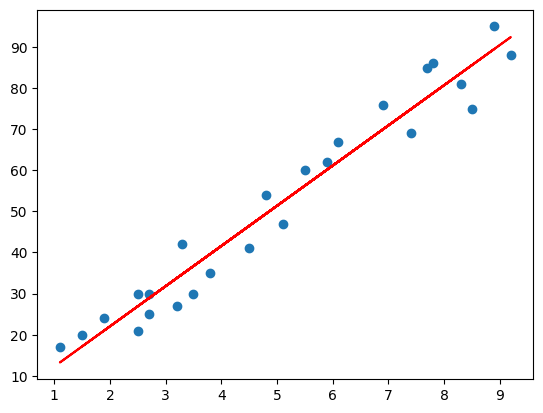

In [20]:
# making the line and into an numpy array # the best fit line explains the entire data
line_of_best_fit = np.array([(slope * hours) + intercept for hours in X]) #predicting the value of Y # y= mx+c # or y_predict (avg) predicted score
# identifying the points of line for the best fit by putting the values of x in equation to identify the therotical(avg) value of Y.
# plot the scatter
plt.scatter(X,Y) # Y is the ground truth ie the real data 
# plot the line of bestfit looking at x and the line of bestfit in the old plt plotted X and Y_predict
plt.plot(X,line_of_best_fit,color = 'Red')# the plotted line is the predicted line or the bestfit line with the least number of error
# the plot function connects the points with respect to x
plt.show()

#### 5. R square method
<p>The R square method helps to identify if the line made by linear regression is able to explain everything or not.</p>
<p>It helps identify two things</p>
<p>If data is all over the place and scattered then data isn't linear the regression dosen't work; data khatam cha relation isn't there</p>
<p>If linear pattern and r square bad then Add more data then the data tends to the average mean reversion gets skew to average; other wise go to a new method of regression like gradiant decent or deep learning method(algo switch). So the list follows </p>
<ul>
<li>Does a linear pattern exist?</li>
<li>Focus upon data and normalization ie increasing data for mean reversion</li>
<li>Even fron data scaling dosen't work then swith algo of regression</li>
</ul>

<ol>
    <li>Identify if the m or C we calculated is wrong.</li>
    <li>If m and c are plotted right but there is no relation among the data.</li>
</ol>
<p>R square value is computed to get how well the best fit line justifies the data</p>
<img src = 'https://miro.medium.com/v2/resize:fit:1200/1*_mVvAFVEGinHlijmmeWwzg.png'>
<ul>
    <li>Y[i] = ground truth/ original score ['Scores']</li>
    <li>Y[i] hat = predicted value of y as per the regression line of best fit(line of best fit values)</li>
    <li>Y[i] mean = mean of ground truth</li>
</ul>

<p>If the value are similar and R square is 1 the model is overfitted. The formula sees the variation of the ground truth to the predicted value divided by variation of the ground truth to the avg value of y<br/>
<br/>
The formula is looking at variatio of the ground truth to the predicted value and ground truth to the avg value </b>
</b>
If R square = 0 then it would mean that predicted value and mean are same then that means the m and c are wrong; ie the avg is only being found so it shows M and C calculated are wrong. ANd there is no relation.</p>


In [23]:
def r_square(y, y_predict):
    n = len(y)
    numerator = 0
    denominator = 0
    y_mean = np.mean(y)
    for i in range(n):
        numerator += (Y[i]-y_predict[i])**2
        denominator += (Y[i]-y_mean)**2
    r2 = 1-(numerator/denominator)
    return r2

r2 = r_square(Y, line_of_best_fit)
print(r2)
# the value of r square is good there is relation.
# if r square is bad then there is no relation.
# if many independent variable then compute every one.

0.9529481969048356


#### 6. Checking Model on unseen data
<p>Ler's try a completely unseen daa point, for folowing cases <br/>
4, 8, 15 hrs study gets how much marks.</p>

[ 41.58688697  80.69010053 149.12072427]


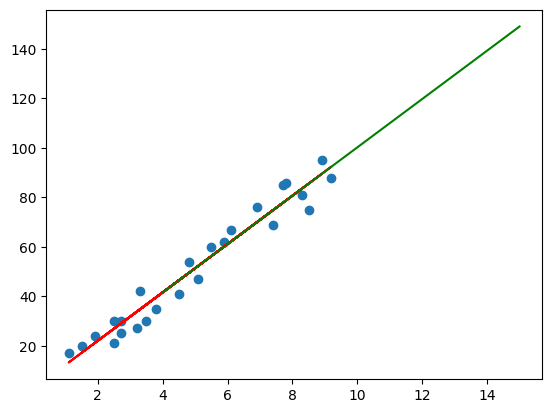

In [31]:
# linear regression from scratch.
new_hrs = np.array([4,8,15])
predicted_score = np.array([(slope * hour) + intercept for hour in new_hrs])
print(predicted_score)
plt.scatter(X,Y)
plt.plot(X,line_of_best_fit, color = 'Red')
plt.plot(new_hrs, predicted_score, color = 'Green')
plt.show()
# polinimal = multiple regression calculate every slope of the line of all the data and compute it all indepent variable in single dimension  or PCA
# in multiple regression of higher dimension 
# first compute the corelation for all variables and then see corealation one by one and only choose variable with high correlation are consider and then linear regression among the variable.
# in case of X1 X2 X3 X5 more independent variable. 5 dimension linear pattern or can be many more and a pattern may occur 